# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading dataset

In [2]:
data=pd.read_excel(r'D:\ict\iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# filling missing values 

In [7]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [8]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


# transforming 

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Classification']=labelencoder.fit_transform(data['Classification'])

In [11]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

# finding correlation matrix 

<AxesSubplot:>

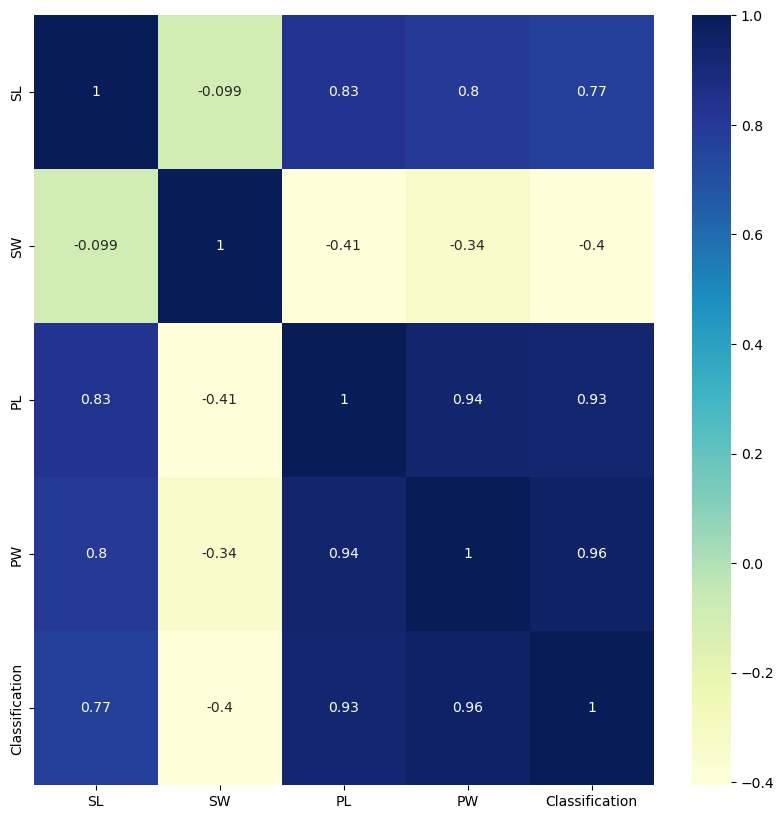

In [12]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu') 

In [13]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# x and y split

In [14]:
x=data.drop(['Classification'],axis=1)
y=data[['Classification']]

In [15]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


# train test split

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [17]:
y_train

,Classification
81,1
133,2
137,2
75,1
109,2
...,...
71,1
106,2
14,0
92,1


# classification algorithms

## logistic regression 

In [18]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred,average='micro'))
print('recall: ',recall_score(y_test,y_pred,average='micro'))
print('f1 score: ',f1_score(y_test,y_pred,average='micro'))

accuracy:  0.9777777777777777
precision:  0.9777777777777777
recall:  0.9777777777777777
f1 score:  0.9777777777777777


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(y_pred,'\n')
print(confusion_matrix(y_test,y_pred))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 1 2 1
 0 0 0 2 1 1 0 0] 

[[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


## knn

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

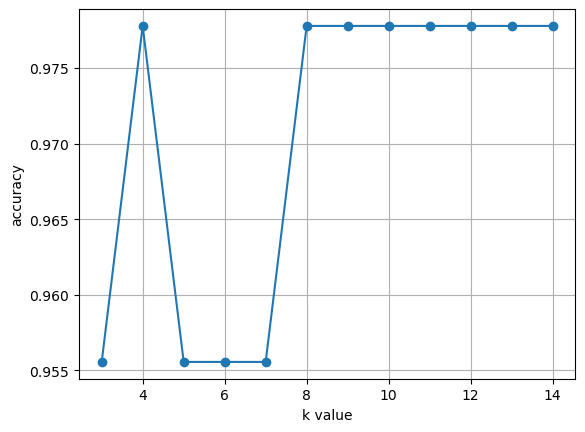

In [20]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()


In [21]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred,average='micro'))
print('recall: ',recall_score(y_test,y_pred,average='micro'))
print('f1 score: ',f1_score(y_test,y_pred,average='micro'))

accuracy:  0.9777777777777777
precision:  0.9777777777777777
recall:  0.9777777777777777
f1 score:  0.9777777777777777


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# SVM

In [22]:
from sklearn.svm import SVC
#linear SVM
svmcls=SVC(kernel='linear')
svmcls=svmcls.fit(x_train,y_train)
y_pred_svm=svmcls.predict(x_test)
confusion_matrix(y_test,y_pred_svm)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [23]:
print('accuracy: ',accuracy_score(y_test,y_pred_svm))
print('precision: ',precision_score(y_test,y_pred_svm,average='micro'))
print('recall: ',recall_score(y_test,y_pred_svm,average='micro'))
print('f1 score: ',f1_score(y_test,y_pred_svm,average='micro'))

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0


In [24]:
# rbf svm
svmcls1=SVC(kernel='rbf')
svmcls1=svmcls1.fit(x_train,y_train)
y_pred_svm1=svmcls1.predict(x_test)
confusion_matrix(y_test,y_pred_svm1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [25]:
print('accuracy: ',accuracy_score(y_test,y_pred_svm1))
print('precision: ',precision_score(y_test,y_pred_svm1,average='micro'))
print('recall: ',recall_score(y_test,y_pred_svm1,average='micro'))
print('f1 score: ',f1_score(y_test,y_pred_svm1,average='micro'))

accuracy:  0.9777777777777777
precision:  0.9777777777777777
recall:  0.9777777777777777
f1 score:  0.9777777777777777


# decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtcls=DecisionTreeClassifier()
dtcls=dtcls.fit(x_train,y_train)
y_pred_dt=dtcls.predict(x_test)
confusion_matrix(y_test,y_pred_dt)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [27]:
print('accuracy: ',accuracy_score(y_test,y_pred_dt))
print('precision: ',precision_score(y_test,y_pred_dt,average='micro'))
print('recall: ',recall_score(y_test,y_pred_dt,average='micro'))
print('f1 score: ',f1_score(y_test,y_pred_dt,average='micro'))

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0


# random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfcls=RandomForestClassifier()
rfcls=rfcls.fit(x_train,y_train)
y_pred_rf=rfcls.predict(x_test)
confusion_matrix(y_test,y_pred_rf)

C:\Users\HP\AppData\Local\Temp\ipykernel_17028\3001110357.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcls=rfcls.fit(x_train,y_train)


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [29]:
print('accuracy: ',accuracy_score(y_test,y_pred_rf))
print('precision: ',precision_score(y_test,y_pred_rf,average='micro'))
print('recall: ',recall_score(y_test,y_pred_rf,average='micro'))
print('f1 score: ',f1_score(y_test,y_pred_rf,average='micro'))

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0


In [30]:
print('random forest, decision tree and linear SVM algorithms gives 100 per accuracy')

random forest, decision tree and linear SVM algorithms gives 100 per accuracy
